In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
edu_df = edu_df.fillna(0)
edu_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,0.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,0.000000
1,1992_ALASKA,ALASKA,1992,0.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,0.000000,0.000000,0.000000,258.859712
2,1992_ARIZONA,ARIZONA,1992,0.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,0.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,0.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,240.389213,288.143144,219.612694,258.700304


In [4]:
edu_df.drop(edu_df[edu_df['TOTAL_REVENUE'] == 0.0].index, inplace=True)
edu_df.drop(edu_df[edu_df['TOTAL_EXPENDITURE'] == 0.0].index, inplace=True)
edu_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,0.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,0.000000
1,1992_ALASKA,ALASKA,1992,0.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,0.000000,0.000000,0.000000,258.859712
2,1992_ARIZONA,ARIZONA,1992,0.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,0.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,0.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,2016_NEW_MEXICO,NEW_MEXICO,2016,319861.0,3765069.0,506995.0,2591444.0,666630.0,3729397.0,1733158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1282,2016_NEW_YORK,NEW_YORK,2016,2590945.0,66912661.0,3369803.0,27437593.0,36105265.0,68282026.0,43964520.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1283,2016_NORTH_CAROLINA,NORTH_CAROLINA,2016,1462036.0,13448045.0,1557900.0,8287126.0,3603019.0,14207389.0,8060544.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1284,2016_NORTH_DAKOTA,NORTH_DAKOTA,2016,108384.0,1788749.0,155453.0,985365.0,647931.0,1963630.0,867650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


## 1) Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [5]:
edu_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1280.000000,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,...,1280.000000,1280.000000,1280.000000,1.280000e+03,1.280000e+03,1.280000e+03,1280.000000,1280.000000,1280.000000,1280.000000
mean,2004.017969,8.794367e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.121035e+05,...,67617.182031,67366.322656,57009.093750,5.440378e+05,2.593464e+05,8.159791e+05,88.778487,104.484998,82.327960,91.996880
std,7.205711,1.059099e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.300089e+05,...,81702.590355,80245.460387,69017.190033,6.548349e+05,3.128828e+05,9.817935e+05,113.891217,134.867315,106.084081,125.700309
min,1992.000000,0.000000e+00,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1998.000000,1.982248e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,8.736900e+04,...,15448.500000,15936.250000,13875.500000,1.244538e+05,5.986600e+04,1.851615e+05,0.000000,0.000000,0.000000,0.000000
50%,2004.000000,6.226125e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.553450e+05,...,47051.500000,46607.000000,38710.500000,3.845650e+05,1.767785e+05,5.754585e+05,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,9.987948e+05,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.035240e+05,...,78183.750000,78893.750000,69020.250000,6.265232e+05,3.024540e+05,9.483510e+05,231.571719,275.340177,216.762724,260.157322
max,2016.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,277.191363


In [6]:
edu_df.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1280,1280
unique,1275,51
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,28


## 2) Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

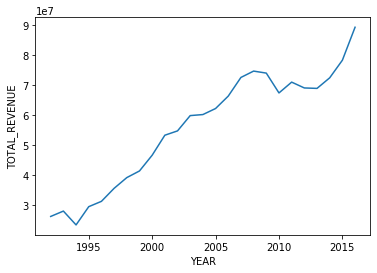

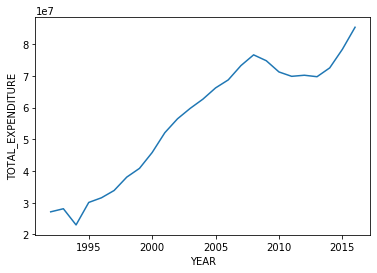

In [7]:
ca_df = edu_df[edu_df['STATE'] == 'CALIFORNIA']
sns.lineplot(data=ca_df, x='YEAR', y='TOTAL_REVENUE')
plt.show()
sns.lineplot(data=ca_df, x='YEAR', y='TOTAL_EXPENDITURE')
plt.show()

## 3) In your chosen state, which of the lessons are the students more successful, math or reading?

In [8]:
ca_nozero = ca_df
ca_nozero.drop(ca_nozero[ca_nozero['AVG_MATH_4_SCORE'] == 0.0].index, inplace=True)
ca_nozero.drop(ca_nozero[ca_nozero['AVG_READING_8_SCORE'] == 0.0].index, inplace=True)
ca_nozero.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,...,9.000000,9.000000,9.000000,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,2006.555556,6.121856e+06,6.271606e+07,6.877971e+06,3.446018e+07,2.137791e+07,6.325219e+07,3.096691e+07,1.816007e+07,3.187710e+06,...,471906.222222,467363.888889,434117.666667,3.764514e+06,1.880054e+06,5.089355e+06,226.843774,269.486359,208.315643,261.833988
std,6.207075,2.693730e+05,1.510369e+07,2.424929e+06,8.127578e+06,5.147737e+06,1.530787e+07,6.857480e+06,4.631760e+06,5.538794e+05,...,17638.649869,28506.367164,70822.349518,1.128457e+05,1.622663e+05,1.924685e+06,9.073075,4.913447,3.631944,5.151512
min,1996.000000,5.460484e+06,3.128298e+07,2.603882e+06,1.706147e+07,1.161762e+07,3.156169e+07,1.688073e+07,9.222569e+06,2.269603e+06,...,435217.000000,406456.000000,298669.000000,3.516572e+06,1.525618e+06,0.000000e+00,209.129083,262.171027,201.912591,254.895247
25%,2003.000000,6.202604e+06,5.981586e+07,5.795655e+06,3.361777e+07,2.011077e+07,5.974988e+07,2.956156e+07,1.703034e+07,2.995767e+06,...,465866.000000,465322.000000,395194.000000,3.742708e+06,1.854518e+06,5.602511e+06,227.454982,267.049501,205.916588,258.768268
50%,2007.000000,6.226523e+06,6.886852e+07,7.200298e+06,3.514121e+07,2.298300e+07,6.972712e+07,3.419488e+07,2.026605e+07,3.461759e+06,...,470515.000000,472381.000000,468281.000000,3.771067e+06,1.952314e+06,5.793407e+06,230.366957,270.381784,208.522186,261.285252
75%,2011.000000,6.234155e+06,7.251694e+07,7.836263e+06,4.008424e+07,2.412940e+07,7.322542e+07,3.468501e+07,2.065519e+07,3.486160e+06,...,485885.000000,489560.000000,492835.000000,3.804640e+06,1.977069e+06,5.881552e+06,231.674927,272.769803,211.358636,264.494066
max,2015.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,2.833121e+07,7.836596e+07,3.895195e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,234.164993,275.901351,212.677949,269.197451


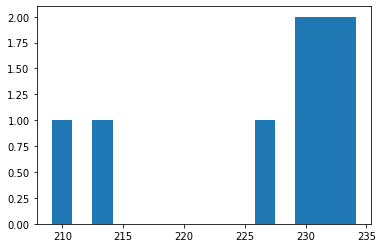

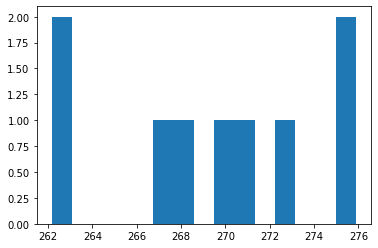

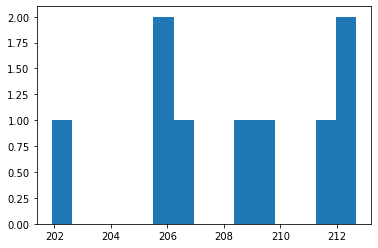

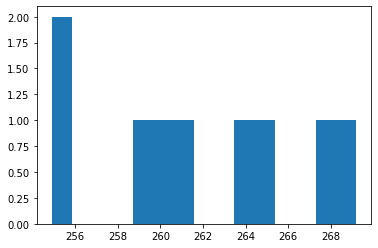

In [9]:
plt.hist(ca_nozero['AVG_MATH_4_SCORE'], bins=15)
plt.show()
plt.hist(ca_nozero['AVG_MATH_8_SCORE'], bins=15)
plt.show()
plt.hist(ca_nozero['AVG_READING_4_SCORE'], bins=15)
plt.show()
plt.hist(ca_nozero['AVG_READING_8_SCORE'], bins=15)
plt.show()

## 4) What are the distributions of the math and reading scores in the sample?

## 5) Now look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [10]:
mean_math_4 = ca_nozero['AVG_MATH_4_SCORE'].mean()
edu_df = edu_df.replace({'AVG_MATH_4_SCORE': {0: mean_math_4}})

mean_math_8 = ca_nozero['AVG_MATH_8_SCORE'].mean()
edu_df = edu_df.replace({'AVG_MATH_8_SCORE': {0: mean_math_8}})

mean_reading_4 = ca_nozero['AVG_READING_4_SCORE'].mean()
edu_df = edu_df.replace({'AVG_READING_4_SCORE': {0: mean_reading_4}})

mean_reading_8 = ca_nozero['AVG_READING_8_SCORE'].mean()
edu_df = edu_df.replace({'AVG_READING_8_SCORE': {0: mean_reading_8}})

In [11]:
edu_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,0.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,261.833988
1,1992_ALASKA,ALASKA,1992,0.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,226.843774,269.486359,208.315643,258.859712
2,1992_ARIZONA,ARIZONA,1992,0.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,0.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,0.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,261.833988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,2016_NEW_MEXICO,NEW_MEXICO,2016,319861.0,3765069.0,506995.0,2591444.0,666630.0,3729397.0,1733158.0,...,0.0,0.0,0.0,0.0,0.0,0.0,226.843774,269.486359,208.315643,261.833988
1282,2016_NEW_YORK,NEW_YORK,2016,2590945.0,66912661.0,3369803.0,27437593.0,36105265.0,68282026.0,43964520.0,...,0.0,0.0,0.0,0.0,0.0,0.0,226.843774,269.486359,208.315643,261.833988
1283,2016_NORTH_CAROLINA,NORTH_CAROLINA,2016,1462036.0,13448045.0,1557900.0,8287126.0,3603019.0,14207389.0,8060544.0,...,0.0,0.0,0.0,0.0,0.0,0.0,226.843774,269.486359,208.315643,261.833988
1284,2016_NORTH_DAKOTA,NORTH_DAKOTA,2016,108384.0,1788749.0,155453.0,985365.0,647931.0,1963630.0,867650.0,...,0.0,0.0,0.0,0.0,0.0,0.0,226.843774,269.486359,208.315643,261.833988


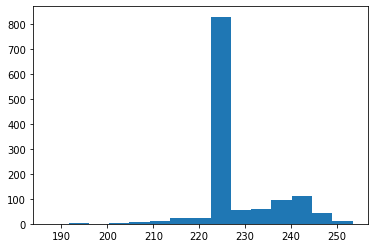

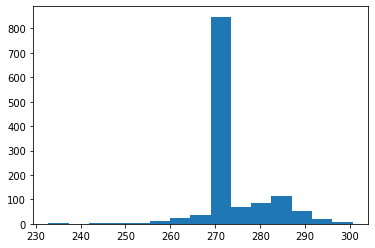

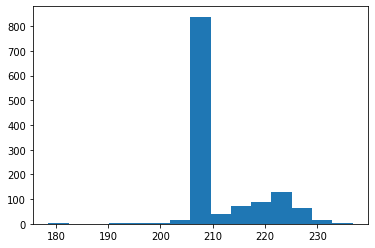

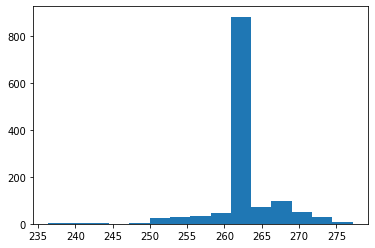

In [12]:
plt.hist(edu_df['AVG_MATH_4_SCORE'], bins=15)
plt.show()
plt.hist(edu_df['AVG_MATH_8_SCORE'], bins=15)
plt.show()
plt.hist(edu_df['AVG_READING_4_SCORE'], bins=15)
plt.show()
plt.hist(edu_df['AVG_READING_8_SCORE'], bins=15)
plt.show()